* MODELS

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.linear_model import Lasso, Ridge



### Dataset numeric features

In [83]:
df = pd.read_csv('data/data_numeric.csv')

In [84]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,-1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,-1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [85]:
feature_X = ['area', 
             'bedrooms', 
             'bathrooms', 
             'stories', 
             'mainroad',
             'guestroom', 
             'basement', 
             'hotwaterheating', 
             'airconditioning',
             'parking', 
             'prefarea', 
             'furnishingstatus']

feature_y = ['price']

In [86]:
len(df)

545

In [87]:
### Cross validation
X = df[feature_X]
y = df[feature_y]

In [88]:
linear_model = LinearRegression()
score_lm = cross_val_score(linear_model, X, y)
mean_lm = np.mean(score_lm)
print(f'Linear Regression: {mean_lm}')

Linear Regression: -9.910676773077242


In [89]:
linear_model.fit(X.iloc[:400],y.iloc[:400])
linear_model.score(X.iloc[400:],y.iloc[400:])

-4.320500188719637

In [90]:
from sklearn.linear_model import Ridge
linear_model = Ridge()
linear_model.fit(X.iloc[:400],y.iloc[:400])
linear_model.score(X.iloc[400:],y.iloc[400:])


-4.360629272247082

In [91]:
(linear_model.predict(X) - y)

,price
0,-5.212976e+06
1,-1.836608e+06
2,-4.649680e+06
3,-3.943203e+06
4,-4.666807e+06
...,...
540,2.059201e+06
541,7.428833e+05
542,1.356846e+06
543,9.518240e+05


In [92]:
score_lm

array([ -1.94277003,  -5.00707214, -16.22431367, -21.10749485,
        -5.27173317])

In [93]:
linear_model = LinearRegression()

mse_scores_ml = cross_val_score(linear_model, X, y, scoring='neg_root_mean_squared_error')

lm = np.mean(-mse_scores_ml)

print(f'MSE promedio (Regresión Lineal): {lm}')

print(f'Porcentage error: {lm*100/y.mean()}')

MSE promedio (Regresión Lineal): 1284724.1363186175
Porcentage error: price    26.951901
dtype: float64


In [94]:
svr_model = SVR(kernel='linear')

mse_scores_svr = cross_val_score(svr_model, X, y, scoring='neg_root_mean_squared_error')

svr = np.mean(-mse_scores_svr)

print(f'MSE promedio (SVR Regression): {svr}')
print(f'Porcentage error: {svr*100/y.mean()}')

MSE promedio (SVR Regression): 1702298.4774188679
Porcentage error: price    35.712087
dtype: float64


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-v

In [95]:
clf_model = RandomForestRegressor()

mse_scores_clf = cross_val_score(clf_model, X, y, scoring='neg_root_mean_squared_error')

clf = np.mean(-mse_scores_clf)

print(f'MSE promedio (Ramdom Forest Regressor): {clf}')
print(f'Porcentage error: {clf*100/y.mean()}')

/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-pack

MSE promedio (Ramdom Forest Regressor): 1499396.9563701833
Porcentage error: price    31.455467
dtype: float64


In [96]:
lgb_model = LGBMRegressor()

mse_scores_lgb = cross_val_score(lgb_model, X, y, scoring='neg_root_mean_squared_error')

lgb = np.mean(-mse_scores_lgb)

print(f'MSE promedio (Light GBM): {lgb}')
print(f'Porcentage error: {lgb*100/y.mean()}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 11
[LightGBM] [Info] Start training from score 4028315.366972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [97]:
clf_model = RandomForestRegressor()
clf_model.fit(X,y)
pd.DataFrame({'columns' : X.columns, 'importance' : clf_model.feature_importances_}).sort_values('importance')

/tmp/ipykernel_478436/2246509998.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_model.fit(X,y)


,columns,importance
4,mainroad,0.008022
7,hotwaterheating,0.018681
5,guestroom,0.019991
6,basement,0.030308
10,prefarea,0.033946
1,bedrooms,0.042181
8,airconditioning,0.053322
3,stories,0.054349
11,furnishingstatus,0.057634
9,parking,0.061058


In [98]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,-1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,-1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


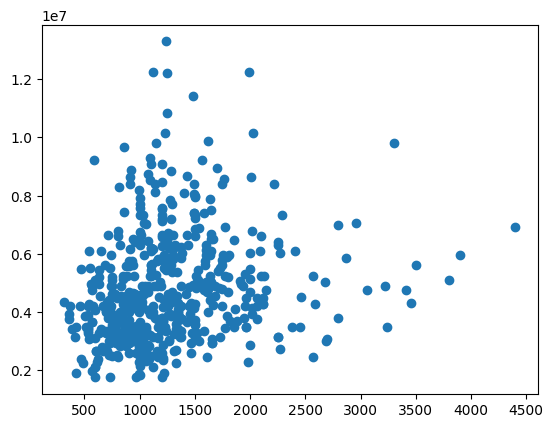

In [99]:
plt.scatter(X['area']/(X['bathrooms']+X['bedrooms']), y)

### Dataset numeric + dummi

In [100]:
df = pd.read_csv('data/data_numeric_dummi.csv')
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [101]:
feature_X = ['area', 
             'bedrooms', 
             'bathrooms', 
             'stories', 
             'mainroad',
             'guestroom', 
             'basement', 
             'hotwaterheating', 
             'airconditioning',
             'parking', 
             'prefarea', 
             'furnished', 'semi-furnished', 'unfurnished']

feature_y = ['price']

### Cross validation
X = df[feature_X]
y = df[feature_y]

In [102]:
linear_model = LinearRegression()

mse_scores_ml = cross_val_score(linear_model, X, y, scoring='neg_root_mean_squared_error')

lm = np.mean(-mse_scores_ml)

print(f'MSE promedio (Regresión Lineal): {lm}')

print(f'Porcentage error: {lm*100/y.mean()}')

MSE promedio (Regresión Lineal): 1297126.6234874355
Porcentage error: price    27.212089
dtype: float64


In [103]:
svr_model = SVR(kernel='linear')

mse_scores_svr = cross_val_score(svr_model, X, y, scoring='neg_root_mean_squared_error')

svr = np.mean(-mse_scores_svr)

print(f'MSE promedio (SVR Regression): {svr}')
print(f'Porcentage error: {svr*100/y.mean()}')

MSE promedio (SVR Regression): 1702307.925770633
Porcentage error: price    35.712285
dtype: float64


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-v

In [104]:
clf_model = RandomForestRegressor()

mse_scores_clf = cross_val_score(clf_model, X, y, scoring='neg_root_mean_squared_error')

clf = np.mean(-mse_scores_clf)

print(f'MSE promedio (Ramdom Forest Regressor): {clf}')
print(f'Porcentage error: {clf*100/y.mean()}')

/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: 

In [ ]:
lgb_model = LGBMRegressor()

mse_scores_lgb = cross_val_score(lgb_model, X, y, scoring='neg_root_mean_squared_error')

lgb = np.mean(-mse_scores_lgb)

print(f'MSE promedio (Light GBM): {lgb}')
print(f'Porcentage error: {lgb*100/y.mean()}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 13
[LightGBM] [Info] Start training from score 4028315.366972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

### Dataset new features

In [ ]:
df = pd.read_csv('data/data_new_features.csv')
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished',
       'stories_area', 'rooms_area'],
      dtype='object')

In [ ]:
feature_X = ['area', 
             'bedrooms', 
             'bathrooms', 
             'stories', 
             'mainroad',
             'guestroom', 
             'basement', 
             'hotwaterheating', 
             'airconditioning',
             'parking', 
             'prefarea', 
             'furnished', 'semi-furnished', 'unfurnished',
             'stories_area', 'rooms_area']

feature_y = ['price']

### Cross validation
X = df[feature_X]
y = df[feature_y]

In [ ]:
linear_model = LinearRegression()

mse_scores_ml = cross_val_score(linear_model, X, y, scoring='neg_root_mean_squared_error')

lm = np.mean(-mse_scores_ml)

print(f'MSE promedio (Regresión Lineal): {lm}')

print(f'Porcentage error: {lm*100/y.mean()}')

MSE promedio (Regresión Lineal): 1303485.4240160289
Porcentage error: price    27.345489
dtype: float64


In [ ]:
svr_model = SVR(kernel='linear')

mse_scores_svr = cross_val_score(svr_model, X, y, scoring='neg_root_mean_squared_error')

svr = np.mean(-mse_scores_svr)

print(f'MSE promedio (SVR Regression): {svr}')
print(f'Porcentage error: {svr*100/y.mean()}')

MSE promedio (SVR Regression): 1520029.7701077275
Porcentage error: price    31.888318
dtype: float64


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-v

In [ ]:
clf_model = RandomForestRegressor()

mse_scores_clf = cross_val_score(clf_model, X, y, scoring='neg_root_mean_squared_error')

clf = np.mean(-mse_scores_clf)

print(f'MSE promedio (Ramdom Forest Regressor): {clf}')
print(f'Porcentage error: {clf*100/y.mean()}')

/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


MSE promedio (Ramdom Forest Regressor): 1502973.35126421
Porcentage error: price    31.530496
dtype: float64


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [ ]:
lgb_model = LGBMRegressor()

mse_scores_lgb = cross_val_score(lgb_model, X, y, scoring='neg_root_mean_squared_error')

lgb = np.mean(-mse_scores_lgb)

print(f'MSE promedio (Light GBM): {lgb}')
print(f'Porcentage error: {lgb*100/y.mean()}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 15
[LightGBM] [Info] Start training from score 4028315.366972
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [ ]:
linear_model = LinearRegression()

msle_scores_ml = cross_val_score(linear_model, X, np.log(y), scoring='neg_root_mean_squared_error')
lm = np.exp(np.mean(-msle_scores_ml))

print(f'MSLE promedio (Regresión Lineal): {lm}')
print(f'Porcentage error: {lm*100/y.mean()}')

MSLE promedio (Regresión Lineal): 1.2904751340907095
Porcentage error: price    0.000027
dtype: float64


In [ ]:
msle_scores_ml

array([-0.36161647, -0.19036939, -0.18359851, -0.18588846, -0.35357952])

In [ ]:
# svr_model = SVR(kernel='linear')

# msle_scores_svr = cross_val_score(svr_model, X, np.log(y), scoring='neg_root_mean_squared_error')

# svr = np.exp(np.mean(-msle_scores_svr))

# print(f'MSLE promedio (SVR Regression): {svr}')
# print(f'Porcentage error: {svr*100/(y.mean())}')

In [ ]:
clf_model = RandomForestRegressor()

msle_scores_clf = cross_val_score(clf_model, X, np.log(y), scoring='neg_root_mean_squared_error')

clf = np.exp(np.mean(-msle_scores_clf))

print(f'MSLE promedio (Ramdom Forest Regressor): {clf}')
print(f'Porcentage error: {clf*100/y.mean()}')

/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


MSLE promedio (Ramdom Forest Regressor): 1.354529161036309
Porcentage error: price    0.000028
dtype: float64


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [ ]:
lgb_model = LGBMRegressor()

msle_scores_lgb = cross_val_score(lgb_model, X, np.log(y), scoring='neg_root_mean_squared_error')

lgb = np.log(np.mean(-msle_scores_lgb))

print(f'MSLE promedio (Light GBM): {lgb}')
print(f'Porcentage error: {lgb*100/y.mean()}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 15
[LightGBM] [Info] Start training from score 15.172985
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
# X_train = X[:400]
# y_train = y[:400]

# X_test = X[400:]
# y_test = y[400:]

In [ ]:
# def log_transform(y):
#     return np.log(y)

# def exp_transform(y):
#     return np.exp(y)

# log_transformer = FunctionTransformer(log_transform)
# exp_transformer = FunctionTransformer(exp_transform)

# pipeline = Pipeline([
#     ('log_transform', log_transformer),
#     ('linear_regression', linear_model),
#     ('exp_transform', exp_transformer)
# ])


# Pipeline.fit(X_train, y_train)

# # Hacer predicciones
# predictions = Pipeline.predict(X_test)

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished,stories_area,rooms_area
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0,2473.333333,1236.666667
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0,2240.000000,1120.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0,4980.000000,1992.000000
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0,3750.000000,1250.000000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0,3710.000000,1484.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1,3000.000000,1000.000000
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0,2400.000000,600.000000
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1,3620.000000,1206.666667
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0,2910.000000,727.500000


### Dataset normalizado

In [9]:
df = pd.read_csv('data/data_normal.csv')

In [10]:
feature_X = ['area_normalizada', 
             'bedrooms', 
             'bathrooms', 
             'stories', 
             'mainroad',
             'guestroom', 
             'basement', 
             'hotwaterheating', 
             'airconditioning',
             'parking', 
             'prefarea', 
             'furnished', 'semi-furnished', 'unfurnished',
             'stories_area', 'rooms_area']

feature_y = ['price']

### Cross validation
X = df[feature_X]
y = df[feature_y]


In [11]:
X_train = X[:400]
X_test = X[400:]
y_train = y[:400]
y_test = y[400:]

In [ ]:
k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)
model = LinearRegression()#(solver= 'liblinear')
 
mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
    # y_train , y_test = y['price'][train_index] , y['price'][test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    mse = mean_squared_error(pred_values, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   


In [ ]:
print(f'MSE promedio (Regresión Lineal): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/y.mean()}')

MSE promedio (Regresión Lineal): 1303485.424016034
Porcentage error: price    27.345489
dtype: float64


In [ ]:
mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train,np.log(y_train))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   
print(f'MSE promedio (Regresión Lineal): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/y.mean()}')

MSE promedio (Regresión Lineal): 1233138.046775936
Porcentage error: price    25.869689
dtype: float64


In [ ]:
mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train , y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    
    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    y_train['price'] = np.where((y_train['price'] < lower_limit['price']) | (y_train['price'] > upper_limit['price']), y_train['price'].mean(), y_train['price'])
    
    # print(y_train['price'].mean())
    
    model.fit(X_train,np.log(y_train))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   
print(f'MSE promedio (Regresión Lineal): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/y.mean()}')

MSE promedio (Regresión Lineal): 1221852.291005596
Porcentage error: price    25.632928
dtype: float64


### Remove outliers 


In [ ]:
## Outliers delete

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)
model = LinearRegression()#(solver= 'liblinear')

mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train , y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_mask = (y_train['price'] >= lower_limit['price']) & (y_train['price'] <= upper_limit['price'])
    X_train_filtered = X_train[outlier_mask]
    y_train_filtered = y_train[outlier_mask]
    
    model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   
print(f'MSE promedio (Regresión Lineal): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/y.mean()}')

MSE promedio (Regresión Lineal): 1214512.3885296911
Porcentage error: price    25.478946
dtype: float64


### Lasso - Ridge


In [ ]:

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)

lasso_alpha = 0.1  
ridge_alpha = 1.0  

lasso_mse_score = []
ridge_mse_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train, y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()

    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_mask = (y_train['price'] >= lower_limit['price']) & (y_train['price'] <= upper_limit['price'])
    X_train_filtered = X_train[outlier_mask]
    y_train_filtered = y_train[outlier_mask]

    ### Modelo Lasso
    lasso_model = Lasso(alpha=lasso_alpha)
    lasso_model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values_lasso = lasso_model.predict(X_test)
    pred_values_exp_lasso = np.exp(pred_values_lasso)
    lasso_mse = mean_squared_error(pred_values_exp_lasso, y_test['price'])
    lasso_mse_score.append(np.sqrt(lasso_mse))

    ### Modelo Ridge
    ridge_model = Ridge(alpha=ridge_alpha)
    ridge_model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values_ridge = ridge_model.predict(X_test)
    pred_values_exp_ridge = np.exp(pred_values_ridge)
    ridge_mse = mean_squared_error(pred_values_exp_ridge, y_test['price'])
    ridge_mse_score.append(np.sqrt(ridge_mse))

lasso_prom_mse = sum(lasso_mse_score) / k
ridge_prom_mse = sum(ridge_mse_score) / k

print(f'MSE promedio (Lasso): {lasso_prom_mse}')
print(f'Porcentaje de error (Lasso): {lasso_prom_mse * 100 / y.mean()}')

print(f'MSE promedio (Ridge): {ridge_prom_mse}')
print(f'Porcentaje de error (Ridge): {ridge_prom_mse * 100 / y.mean()}')


MSE promedio (Lasso): 1772837.793897542
Porcentaje de error (Lasso): price    37.191913
dtype: float64
MSE promedio (Ridge): 1215038.8891484137
Porcentaje de error (Ridge): price    25.489992
dtype: float64


In [12]:
### Mejoro Ridge
### Lasso - Ridge 
k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)

ridge_alpha = 1

ridge_mse_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train, y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()

    ### Modelo Ridge
    ridge_model = Ridge(alpha=ridge_alpha)
    ridge_model.fit(X_train, np.log(y_train))

    pred_values_ridge = ridge_model.predict(X_test)
    pred_values_exp_ridge = np.exp(pred_values_ridge)
    
    ridge_mse = mean_squared_error(pred_values_exp_ridge, y_test['price'])
    ridge_mse_score.append(np.sqrt(ridge_mse))

ridge_prom_mse = sum(ridge_mse_score) / k

print(f'MSE promedio (Ridge): {ridge_prom_mse}')
print(f'Porcentaje de error (Ridge): {ridge_prom_mse * 100 / y.mean()}')

MSE promedio (Ridge): 1232999.6672611148
Porcentaje de error (Ridge): price    25.866786
dtype: float64


In [ ]:
### Random Forest
model = RandomForestRegressor()

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)

mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train , y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_mask = (y_train['price'] >= lower_limit['price']) & (y_train['price'] <= upper_limit['price'])
    X_train_filtered = X_train[outlier_mask]
    y_train_filtered = y_train[outlier_mask]
    
    model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   
print(f'MSE promedio (Random FOrest Regressor): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/y.mean()}')

/tmp/ipykernel_478436/2321701413.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))
/tmp/ipykernel_478436/2321701413.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))
/tmp/ipykernel_478436/2321701413.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))


/tmp/ipykernel_478436/2321701413.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))


MSE promedio (Random FOrest Regressor): 1424484.53477762
Porcentage error: price    29.883899
dtype: float64


/tmp/ipykernel_478436/2321701413.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))


### Feature important, feature selection

In [ ]:
fi = pd.DataFrame()
fi['Columns'] = X.columns.tolist()
fi['Feature_importances'] = (model.feature_importances_).tolist()

In [ ]:
fi = fi.sort_values('Feature_importances', ascending=False)

In [ ]:
fi

,Columns,Feature_importances
0,area_normalizada,0.379693
14,stories_area,0.115274
2,bathrooms,0.109795
15,rooms_area,0.085362
9,parking,0.049657
8,airconditioning,0.042116
10,prefarea,0.031657
6,basement,0.030205
1,bedrooms,0.028959
7,hotwaterheating,0.025168


In [ ]:
fi_filtrado = fi[fi['Feature_importances'] > 0.015]

In [ ]:
fi_filtrado['Columns'].tolist()

['area_normalizada',
 'stories_area',
 'bathrooms',
 'rooms_area',
 'parking',
 'airconditioning',
 'prefarea',
 'basement',
 'bedrooms',
 'hotwaterheating',
 'guestroom',
 'stories',
 'unfurnished',
 'semi-furnished',
 'mainroad']

In [ ]:
feature_X_fi = fi_filtrado['Columns'].tolist()

X_fi = df[feature_X_fi]


In [ ]:
### Random Forest - Feature importances
model = RandomForestRegressor()

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)

mse_score = []
for train_index , test_index in kf.split(X_fi):
    X_train , X_test = X_fi.iloc[train_index,:].copy(), X_fi.iloc[test_index,:].copy()
    y_train , y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_mask = (y_train['price'] >= lower_limit['price']) & (y_train['price'] <= upper_limit['price'])
    X_train_filtered = X_train[outlier_mask]
    y_train_filtered = y_train[outlier_mask]
    
    model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   
print(f'MSE promedio (Random FOrest Regressor): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/y.mean()}')

/tmp/ipykernel_478436/2960464845.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))
/tmp/ipykernel_478436/2960464845.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))


/tmp/ipykernel_478436/2960464845.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))
/tmp/ipykernel_478436/2960464845.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))
/tmp/ipykernel_478436/2960464845.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_filtered, np.log(y_train_filtered))


MSE promedio (Random FOrest Regressor): 1424071.27743688
Porcentage error: price    29.875229
dtype: float64


In [ ]:
#### Light GBM
model = LGBMRegressor()

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)

mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train , y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_mask = (y_train['price'] >= lower_limit['price']) & (y_train['price'] <= upper_limit['price'])
    X_train_filtered = X_train[outlier_mask]
    y_train_filtered = y_train[outlier_mask]
    
    model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   
print(f'MSE promedio (Light GBM): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/y.mean()}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 413
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 15
[LightGBM] [Info] Start training from score 15.172985
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [ ]:
#### SVR
model = SVR(kernel='linear')

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)

mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train , y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_mask = (y_train['price'] >= lower_limit['price']) & (y_train['price'] <= upper_limit['price'])
    X_train_filtered = X_train[outlier_mask]
    y_train_filtered = y_train[outlier_mask]
    
    model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   

print(f'MSLE promedio (SVR Regression): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/(y.mean())}')

MSLE promedio (SVR Regression): 1203029.9209147445
Porcentage error: price    25.238059
dtype: float64


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-v

### Hyperparameters search


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
param_grid = [
  {'C': [1, 0.5, 5, 0.01, 10, 20], 'kernel': ['linear'], 'epsilon': [0.1, 0.5, 1, 10, 5, 20]}
]

model = SVR() 
grid_search = GridSearchCV(model, param_grid, scoring='neg_root_mean_squared_error')

grid_search.fit(X_train, np.log(y_train))

print("Best parameters search:")
print(grid_search.best_params_)



/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-v

Best parameters search:
{'C': 0.01, 'epsilon': 0.1, 'kernel': 'linear'}


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-v

In [ ]:
grid_search.best_params_

{'C': 0.01, 'epsilon': 0.1, 'kernel': 'linear'}

In [ ]:
model = SVR(**grid_search.best_params_) 
cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error').mean()

/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-v

-1728283.6823338917

In [ ]:
model = SVR(**grid_search.best_params_)

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)

mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train , y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_mask = (y_train['price'] >= lower_limit['price']) & (y_train['price'] <= upper_limit['price'])
    X_train_filtered = X_train[outlier_mask]
    y_train_filtered = y_train[outlier_mask]
    
    model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   

print(f'MSLE promedio (SVR Regression): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/(y.mean())}')

MSLE promedio (SVR Regression): 1216607.1008757888
Porcentage error: price    25.522891
dtype: float64


/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-v

In [ ]:
params = grid_search.best_params_.copy()
params['C'] = 5
model = SVR(**params) 
cross_val_score(model, X_train, np.log(y_train), scoring='neg_mean_squared_log_error').mean()

/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-v

-0.00020108218326042194

In [ ]:
model = SVR(**params)

k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)

mse_score = []
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train , y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
    
    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_mask = (y_train['price'] >= lower_limit['price']) & (y_train['price'] <= upper_limit['price'])
    X_train_filtered = X_train[outlier_mask]
    y_train_filtered = y_train[outlier_mask]
    
    model.fit(X_train_filtered, np.log(y_train_filtered))
    pred_values = model.predict(X_test)

    pred_values_exp = np.exp(pred_values)
     
    mse = mean_squared_error(pred_values_exp, y_test['price'])
    mse_score.append(np.sqrt(mse))

prom_mse = sum(mse_score)/k   

print(f'MSLE promedio (SVR Regression): {prom_mse}')
print(f'Porcentage error: {prom_mse*100/(y.mean())}')

/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/belenareal/python_projects/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-v

MSLE promedio (SVR Regression): 1202053.7049999083
Porcentage error: price    25.217579
dtype: float64


Modelo elegido: SVM

Cross Validation: K-fold

Outliers: delete

Hyperparameters: kernel='linear', C='5' 


## More features (dummis)

In [2]:
df = pd.read_csv('data/data_dummis.csv')

In [3]:
X = df.drop(columns=['price'])

y = df['price']

In [4]:
X_train = X[:400]
X_test = X[400:]
y_train = y[:400]
y_test = y[400:]

In [6]:
y_test

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
104     6195000
105     6160000
106     6160000
107     6125000
108     6107500
Name: price, Length: 109, dtype: int64

In [7]:
k = 5
kf = KFold(n_splits=k, random_state=None, shuffle=False)

ridge_alpha = 1

ridge_mse_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
    y_train, y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()

    ### Modelo Ridge
    ridge_model = Ridge(alpha=ridge_alpha)
    ridge_model.fit(X_train, np.log(y_train))

    pred_values_ridge = ridge_model.predict(X_test)
    pred_values_exp_ridge = np.exp(pred_values_ridge)
    
    ridge_mse = mean_squared_error(pred_values_exp_ridge, y_test)
    ridge_mse_score.append(np.sqrt(ridge_mse))

ridge_prom_mse = sum(ridge_mse_score) / k

print(f'MSE promedio (Ridge): {ridge_prom_mse}')
print(f'Porcentaje de error (Ridge): {ridge_prom_mse * 100 / y.mean()}')

MSE promedio (Ridge): 1253772.894298412
Porcentaje de error (Ridge): 26.302582528715728


In [ ]:
df

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,...,stories_3,stories_4,parking_1,parking_2,parking_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
0,13300000,7420,1,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,0
1,12250000,8960,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,12250000,9960,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
3,12215000,7500,1,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,11410000,7420,1,1,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
541,1767150,2400,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
542,1750000,3620,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
543,1750000,2910,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
target = 'price'
#Splitting the data intro training & testing sets
m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bathrooms_2,...,stories_3,stories_4,parking_1,parking_2,parking_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
count,4.360000e+02,4.360000e+02,4.360000e+02,436.000000,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,...,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02
mean,4.481634e-17,-1.588943e-16,-8.148426e-18,0.000000,-4.481634e-17,4.787200e-17,-5.296477e-17,-4.685345e-17,1.059295e-16,-1.425975e-17,...,-2.851949e-17,-2.444528e-17,5.296477e-17,-1.629685e-17,1.629685e-17,-2.037106e-17,1.018553e-16,6.111319e-18,-1.018553e-17,1.629685e-17
std,1.001149e+00,1.001149e+00,1.001149e+00,1.001149,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,...,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00,1.001149e+00
min,-1.540198e+00,-2.503331e+00,-4.558028e-01,-0.738985,-2.413554e-01,-6.553687e-01,-5.490834e-01,-8.385255e-01,-6.986091e-01,-5.808815e-01,...,-2.954349e-01,-2.908214e-01,-5.844129e-01,-5.064426e-01,-1.532129e-01,-5.808815e-01,-1.137865e+00,-4.336022e-01,-1.277381e-01,-6.788442e-02
25%,-7.389912e-01,3.994677e-01,-4.558028e-01,-0.738985,-2.413554e-01,-6.553687e-01,-5.490834e-01,-8.385255e-01,-6.986091e-01,-5.808815e-01,...,-2.954349e-01,-2.908214e-01,-5.844129e-01,-5.064426e-01,-1.532129e-01,-5.808815e-01,-1.137865e+00,-4.336022e-01,-1.277381e-01,-6.788442e-02
50%,-2.933591e-01,3.994677e-01,-4.558028e-01,-0.738985,-2.413554e-01,-6.553687e-01,-5.490834e-01,-8.385255e-01,-6.986091e-01,-5.808815e-01,...,-2.954349e-01,-2.908214e-01,-5.844129e-01,-5.064426e-01,-1.532129e-01,-5.808815e-01,8.788388e-01,-4.336022e-01,-1.277381e-01,-6.788442e-02
75%,5.932510e-01,3.994677e-01,-4.558028e-01,1.353207,-2.413554e-01,1.525859e+00,-5.490834e-01,1.192570e+00,1.431416e+00,1.721522e+00,...,-2.954349e-01,-2.908214e-01,1.711119e+00,-5.064426e-01,-1.532129e-01,1.721522e+00,8.788388e-01,-4.336022e-01,-1.277381e-01,-6.788442e-02
max,5.144981e+00,3.994677e-01,2.193931e+00,1.353207,4.143268e+00,1.525859e+00,1.821217e+00,1.192570e+00,1.431416e+00,1.721522e+00,...,3.384840e+00,3.438536e+00,1.711119e+00,1.974557e+00,6.526868e+00,1.721522e+00,8.788388e-01,2.306261e+00,7.828519e+00,1.473092e+01



                                          Standardardization on Testing set                                          


,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,bathrooms_2,...,stories_3,stories_4,parking_1,parking_2,parking_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,...,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,1.090000e+02
mean,0.012148,-0.053262,0.079006,-0.028792,-0.201129,0.165093,0.038055,0.037268,-0.014656,-0.095053,...,-0.160379,-0.051321,-0.268514,-0.073975,-0.030643,-0.031684,-0.138764,0.219943,0.091241,-6.788442e-02
std,1.049393,1.058060,1.068435,0.995276,0.419971,1.061505,1.027938,1.010532,0.999101,0.943777,...,0.695152,0.918455,0.794452,0.945583,0.900665,0.985784,1.012967,1.173085,1.307667,1.394189e-17
min,-1.626765,-2.503331,-0.455803,-0.738985,-0.241355,-0.655369,-0.549083,-0.838525,-0.698609,-0.580881,...,-0.295435,-0.290821,-0.584413,-0.506443,-0.153213,-0.580881,-1.137865,-0.433602,-0.127738,-6.788442e-02
25%,-0.705249,0.399468,-0.455803,-0.738985,-0.241355,-0.655369,-0.549083,-0.838525,-0.698609,-0.580881,...,-0.295435,-0.290821,-0.584413,-0.506443,-0.153213,-0.580881,-1.137865,-0.433602,-0.127738,-6.788442e-02
50%,-0.090905,0.399468,-0.455803,-0.738985,-0.241355,-0.655369,-0.549083,-0.838525,-0.698609,-0.580881,...,-0.295435,-0.290821,-0.584413,-0.506443,-0.153213,-0.580881,-1.137865,-0.433602,-0.127738,-6.788442e-02
75%,0.537402,0.399468,-0.455803,1.353207,-0.241355,1.525859,-0.549083,1.192570,1.431416,-0.580881,...,-0.295435,-0.290821,-0.584413,-0.506443,-0.153213,-0.580881,0.878839,-0.433602,-0.127738,-6.788442e-02
max,4.865734,0.399468,2.193931,1.353207,4.143268,1.525859,1.821217,1.192570,1.431416,1.721522,...,3.384840,3.438536,1.711119,1.974557,6.526868,1.721522,0.878839,2.306261,7.828519,-6.788442e-02


Dropped Features -->  ['bedrooms_3', 'stories_2', 'furnishingstatus_unfurnished', 'stories_4', 'area', 'basement', 'parking_2', 'bathrooms_2', 'bedrooms_2', 'bathrooms_4', 'bedrooms_5', 'prefarea', 'airconditioning', 'mainroad', 'hotwaterheating', 'guestroom', 'parking_1', 'furnishingstatus_semi-furnished', 'parking_3']


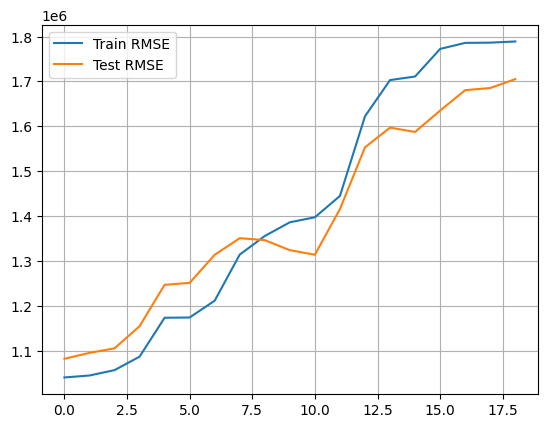

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA


Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
#Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
#Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

        #Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
        #Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)
        
print('Dropped Features --> ',DROP)
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()


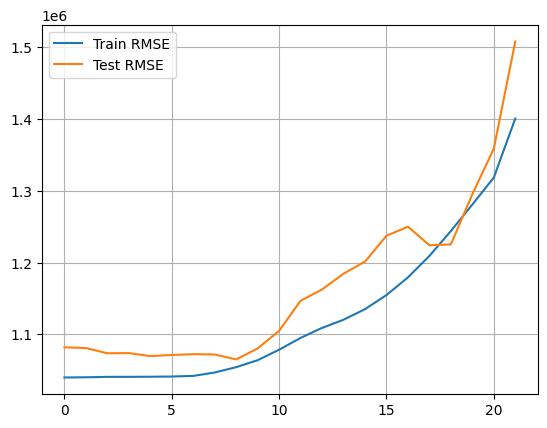

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()